# Credit Card Fraud Detection 

In [1]:
#Loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Loading the Dataset
df=pd.read_csv("fraudTrain.csv")
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
# Checking the number of rows and columns in Dataset
print(df.shape)


(1296675, 23)


In [4]:
#Check the Data types of Dataset
df.dtypes


Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [5]:
# Get info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
#Check Summary Statistics
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# Data Preprocessing 

In [7]:
# Checking the Missing values in our dataset
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

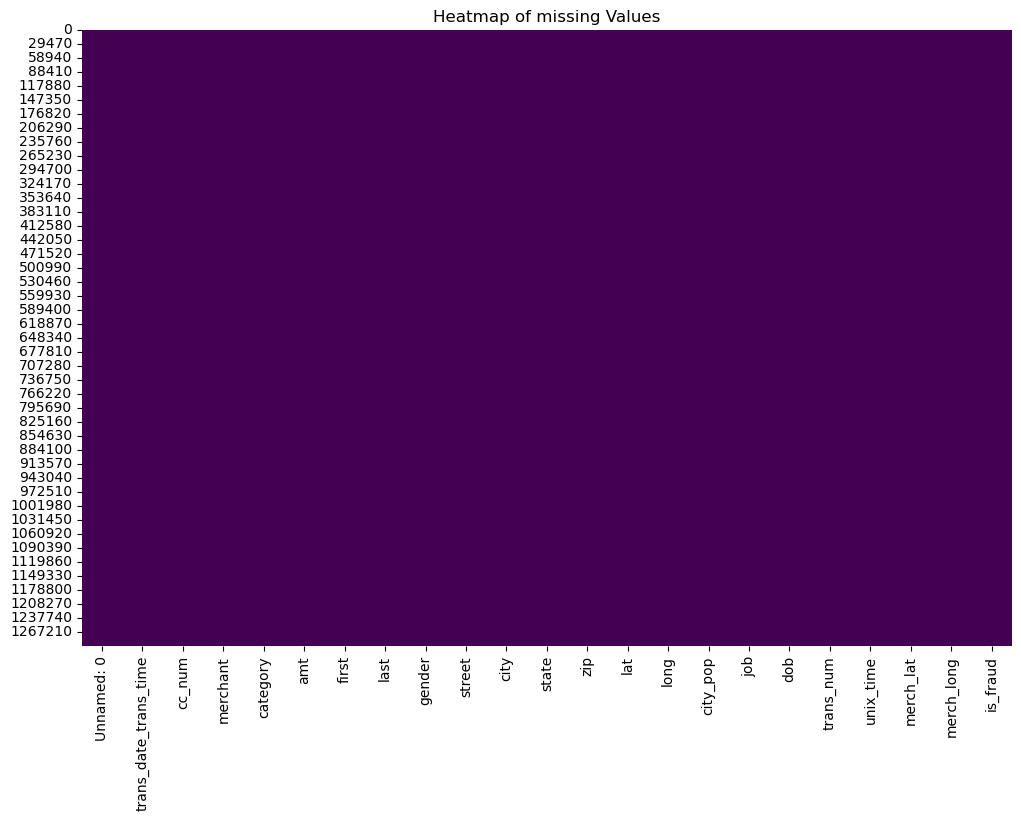

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Heatmap of missing Values')
plt.show()

<Axes: xlabel='is_fraud'>

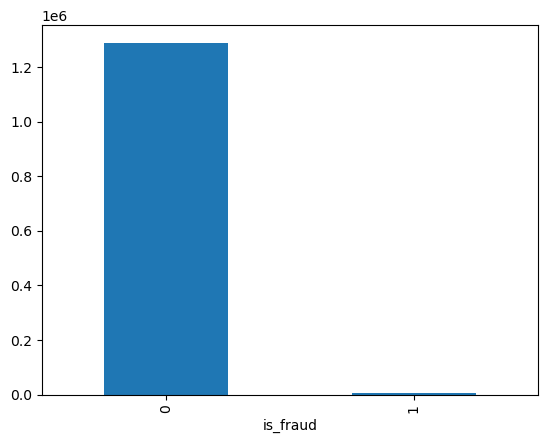

In [9]:
df.groupby("is_fraud").count()["cc_num"].plot(kind="bar")

In [10]:
#Resampling
fraud=df[df["is_fraud"]== 1]
not_fraud=df[df["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])

7506
1289169


In [11]:
not_fraud=not_fraud.sample(fraud.shape[0],random_state=42)
df_new=pd.concat([fraud,not_fraud])

<Axes: xlabel='is_fraud'>

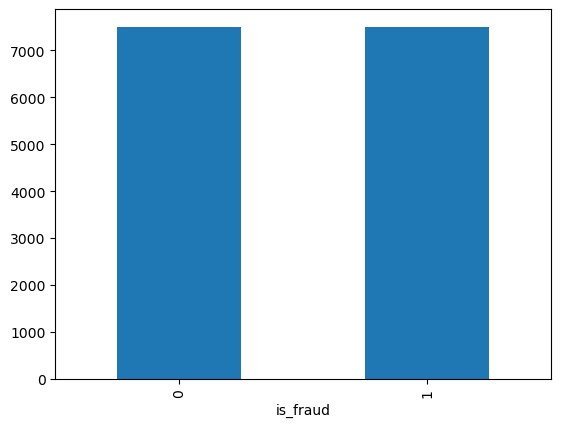

In [12]:
df_new.groupby("is_fraud").count()["cc_num"].plot(kind="bar")

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 2449 to 566921
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15012 non-null  int64  
 1   trans_date_trans_time  15012 non-null  object 
 2   cc_num                 15012 non-null  int64  
 3   merchant               15012 non-null  object 
 4   category               15012 non-null  object 
 5   amt                    15012 non-null  float64
 6   first                  15012 non-null  object 
 7   last                   15012 non-null  object 
 8   gender                 15012 non-null  object 
 9   street                 15012 non-null  object 
 10  city                   15012 non-null  object 
 11  state                  15012 non-null  object 
 12  zip                    15012 non-null  int64  
 13  lat                    15012 non-null  float64
 14  long                   15012 non-null  float64
 15

In [14]:
useless_columns=[
    'Unnamed: 0',
    'trans_date_trans_time',
    'cc_num',
    'merchant',
    'first',
    'last',
    'street',
    'job',
    'zip',
    'trans_num',
    'unix_time',
    'merch_lat',
    'merch_long'
]
# Dropping the columns
df_new.drop(columns=useless_columns,inplace=True)

In [15]:
df_new.isna().sum().sum()

0

In [16]:
#Checking duplicates in dataframe
df_new.duplicated().sum()

2

In [17]:
#Droping duplicates 
df_new.drop_duplicates()

,category,amt,gender,city,state,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,M,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,gas_transport,11.52,F,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,grocery_pos,276.31,F,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,gas_transport,7.03,M,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,grocery_pos,275.73,F,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
...,...,...,...,...,...,...,...,...,...,...
477760,personal_care,74.48,M,Tower Hill,IL,39.3900,-88.9597,1532,1980-01-09,0
1215574,food_dining,62.22,M,Oak Hill,NY,42.4069,-74.1528,277,1971-12-12,0
437865,personal_care,49.65,M,Harrington Park,NJ,40.9918,-73.9800,4664,1965-06-30,0
1047310,shopping_net,3.62,F,Camden,TX,30.9000,-94.7547,99,1965-11-21,0


In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 2449 to 566921
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  15012 non-null  object 
 1   amt       15012 non-null  float64
 2   gender    15012 non-null  object 
 3   city      15012 non-null  object 
 4   state     15012 non-null  object 
 5   lat       15012 non-null  float64
 6   long      15012 non-null  float64
 7   city_pop  15012 non-null  int64  
 8   dob       15012 non-null  object 
 9   is_fraud  15012 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 1.3+ MB


# Feature Engineering and Label Encoding


In [19]:
df_new["dob"]=pd.to_datetime(df_new["dob"])


In [20]:
from datetime import datetime
df_new["dob"]=df_new["dob"].dt.year
df_new["dob"]=datetime.now().year-df_new["dob"]
df_new=df_new.rename(columns={"dob": "age"})
df_new

,category,amt,gender,city,state,lat,long,city_pop,age,is_fraud
2449,grocery_pos,281.06,M,Collettsville,NC,35.9946,-81.7266,885,36,1
2472,gas_transport,11.52,F,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2523,grocery_pos,276.31,F,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2546,gas_transport,7.03,M,Collettsville,NC,35.9946,-81.7266,885,36,1
2553,grocery_pos,275.73,F,San Antonio,TX,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...,...
477760,personal_care,74.48,M,Tower Hill,IL,39.3900,-88.9597,1532,44,0
1215574,food_dining,62.22,M,Oak Hill,NY,42.4069,-74.1528,277,53,0
437865,personal_care,49.65,M,Harrington Park,NJ,40.9918,-73.9800,4664,59,0
1047310,shopping_net,3.62,F,Camden,TX,30.9000,-94.7547,99,59,0


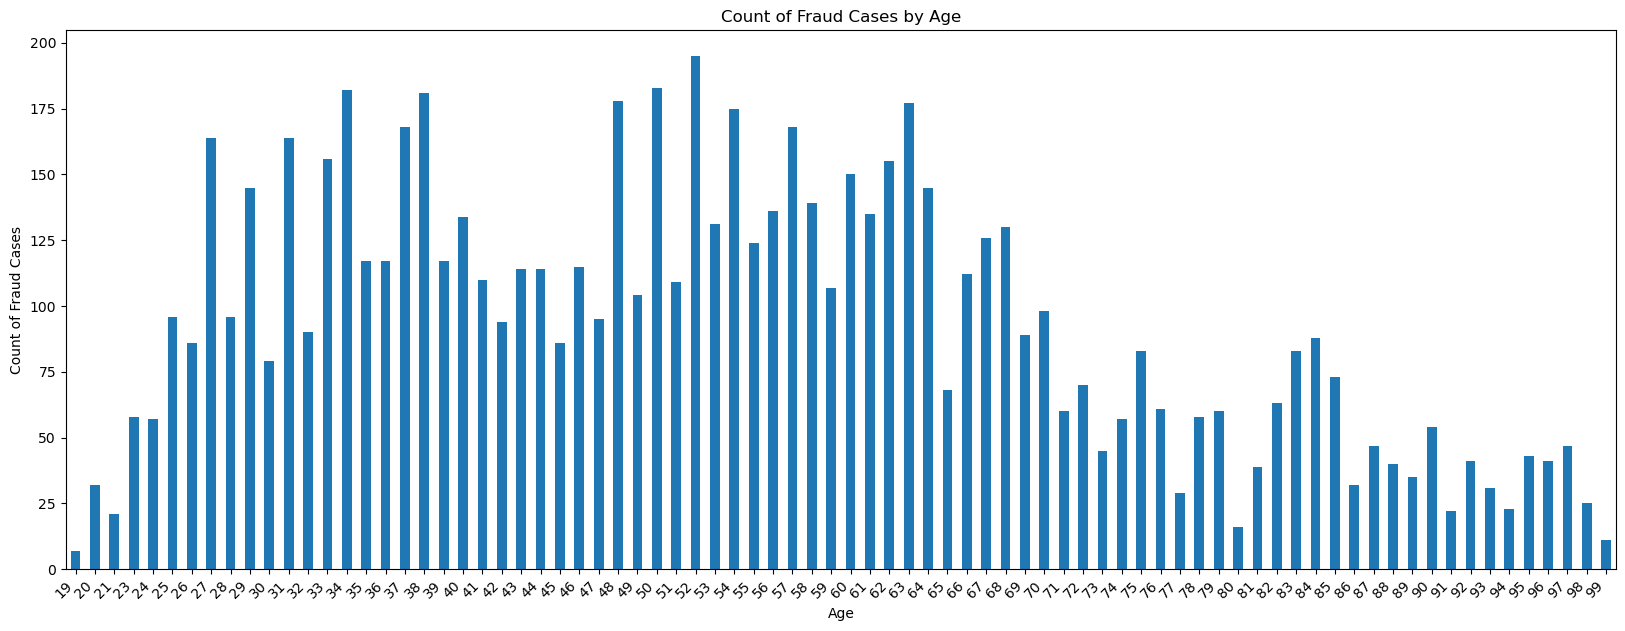

In [21]:
plt.figure(figsize=(20,7))
ax=df_new[df_new["is_fraud"]==1].groupby('age').count()["is_fraud"].plot(kind="bar")
ax.set_xlabel('Age')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Age')
plt.xticks(rotation=45,ha='right')
plt.show()

In [22]:
numeric_columns=[i for i in df_new.columns if df_new[i].dtype=="int64" or df_new[i].dtype=="int32" or 
                 df_new[i].dtype=="float64"  ]
categorical_columns=[i for i in df_new.columns if df_new[i].dtype=="object"]
print(numeric_columns)
print(categorical_columns)

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['category', 'gender', 'city', 'state']


In [23]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder =LabelEncoder()
for col in categorical_columns:
    df_new[col]=encoder.fit_transform(df_new[col])
    
df_new

,category,amt,gender,city,state,lat,long,city_pop,age,is_fraud
2449,4,281.06,1,165,27,35.9946,-81.7266,885,36,1
2472,2,11.52,0,721,43,29.4400,-98.4590,1595797,64,1
2523,4,276.31,0,721,43,29.4400,-98.4590,1595797,64,1
2546,2,7.03,1,165,27,35.9946,-81.7266,885,36,1
2553,4,275.73,0,721,43,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...,...
477760,10,74.48,1,803,14,39.3900,-88.9597,1532,44,0
1215574,1,62.22,1,592,34,42.4069,-74.1528,277,53,0
437865,10,49.65,1,326,31,40.9918,-73.9800,4664,59,0
1047310,11,3.62,0,118,43,30.9000,-94.7547,99,59,0


In [24]:
#Standard Scaling and Extrating Independent features and Dependent features for model
columns=df_new.columns.tolist()
columns.remove('is_fraud')
X=df_new.drop(['is_fraud'],axis=1)
y=df_new['is_fraud']

scaler=StandardScaler()

X[columns]=scaler.fit_transform(X[columns])
df_new[X.columns]=X
df_new


,category,amt,gender,city,state,lat,long,city_pop,age,is_fraud
2449,-0.718863,-0.049366,1.044836,-1.061220,0.016070,-0.511971,0.606956,-0.295264,-0.904634,1
2472,-1.238025,-0.770247,-0.957088,1.104182,1.127136,-1.790084,-0.581048,4.959033,0.647630,1
2523,-0.718863,-0.062070,-0.957088,1.104182,1.127136,-1.790084,-0.581048,4.959033,0.647630,1
2546,-1.238025,-0.782256,1.044836,-1.061220,0.016070,-0.511971,0.606956,-0.295264,-0.904634,1
2553,-0.718863,-0.063621,-0.957088,1.104182,1.127136,-1.790084,-0.581048,4.959033,0.647630,1
...,...,...,...,...,...,...,...,...,...,...
477760,0.838624,-0.601861,1.044836,1.423540,-0.886671,0.150114,0.093404,-0.293133,-0.461130,0
1215574,-1.497606,-0.634651,1.044836,0.601778,0.502161,0.738394,1.144698,-0.297267,0.037812,0
437865,0.838624,-0.668269,1.044836,-0.434188,0.293836,0.462457,1.156967,-0.282815,0.370440,0
1047310,1.098206,-0.791376,-0.957088,-1.244267,1.127136,-1.505392,-0.318042,-0.297854,0.370440,0


# Building Models

We will build several machine learning models to detect fraudulent transactions.This include
logistic regression,decision trees,SVC.

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
 #Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVC': SVC()
}

In [34]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1,y_pred

In [36]:
# Evaluate each model
results = {}
predictions={}
for name, model in models.items():
    accuracy, precision, recall, f1,y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    predictions[name] = y_pred
# Create a DataFrame to display the results
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.845821,0.937186,0.742535,0.828582
Decision Tree,0.955045,0.959170,0.950896,0.955015
SVC,0.859141,0.971304,0.741208,0.840798


# Evaluating the Models

We will evaluate the performance of our models using various metrics such as accuracy, 
precision, recall, and the F1 score.


Evaluation Metrics:

1.Accuracy
2.Precision
3.Recall
4.F1 Score

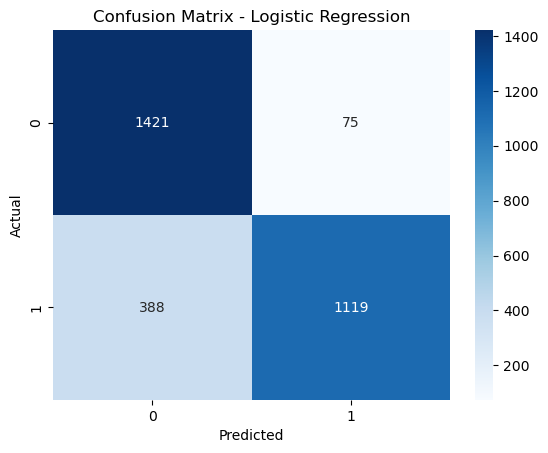

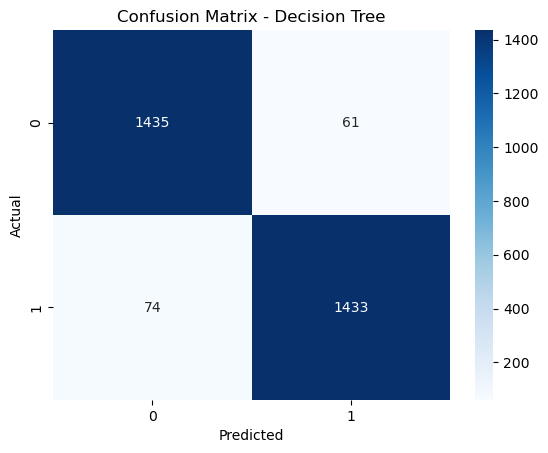

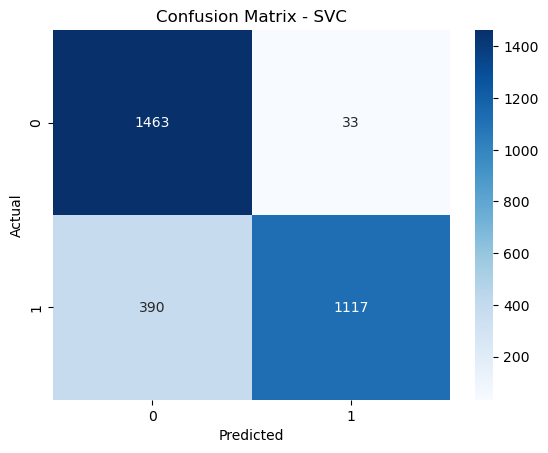

In [37]:
# Confusion Matrix Plotting
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plotting confusion matrices for each model
for name, y_pred in predictions.items():
    plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix - {name}')

# THANK YOU !
#Done by Anshika Tyagi